Solving the Schrödinger equation

In [70]:
# This code contains different methods to solve the Schrödinger equation for the infinite well, finite square well and the Woods-Saxon potential well.

In [71]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.integrate import odeint

In [72]:
def rk4_simul(f1,f2,t0,x0,y0,h):
    k1 = h*f1(t0, x0, y0)
    l1 = h*f2(t0, x0, y0)

    k2 = h*f1(t0+h/2, x0+k1/2, y0+l1/2)
    l2 = h*f2(t0+h/2, x0+k1/2, y0+l1/2)

    k3 = h*f1(t0+h/2, x0+k2/2, y0+l2/2)
    l3 = h*f2(t0+h/2, x0+k2/2, y0+l2/2)

    k4 = h*f1(t0+h, x0+k3, y0+l3)
    l4 = h*f2(t0+h, x0+k3, y0+l3)

    x1 = x0 + (k1+2*k2+2*k3+k4)/6
    y1 = y0 + (l1+2*l2+2*l3+l4)/6
    
    return x1, y1

# Infinite square well potential

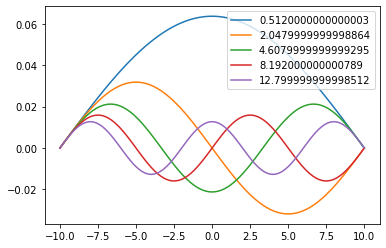

In [73]:
# METHOD 1: Using tolerances for psi to converge to zero at the L=10 endpoint

dE = 0.001
m = 938.272
hc = 197.3269631
L = 20
pi = math.pi
psi0 = 0
dpsi0 = 0.01
Emin = 0
Emax = ((5.5*pi*hc/L)**2)/(2*m)

n = 100
h = L/n
x0 = -L/2

def V(x):
    return 0
def f1(x,psi,dpsi):
    return dpsi
def f2(x,psi,dpsi):
    return -2*m*(E-V(x))*psi/(hc**2)

E = Emin
while (E<Emax):
    psi2 = psi0
    dpsi2 = dpsi0
    x2 = x0
    x_list = []
    psi_list = []
    for i in range(n):
        psi1 = psi2
        dpsi1 = dpsi2
        x1 = x2
        x_list.append(x1)
        psi_list.append(psi1)
        psi2, dpsi2 = rk4_simul(f1,f2,x1,psi1,dpsi1,h)
        x2 = x1 + h
    if (abs(psi2)<0.51e-5):
        x_list.append(x2)
        psi_list.append(psi2)
        plt.plot(x_list,psi_list, label = str(E))
        E=E+0.5
    E = E + dE
plt.legend()
plt.show()


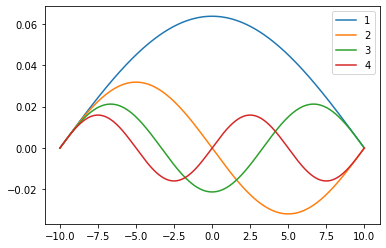

In [74]:
# METHOD 2: Solve the infinite well differential equation using odeint

c=3*(10**8)*(10**(-15))
hbar=197.327/c
m=938.272/(c**2)

def dU_dx(U, x, n):    
    # Here U is a vector such that y=U[0] and z=U[1]. This function returns [y', z']
    return [U[1], -((np.pi*n/20)**2)*U[0]]

N=1000
U0 = [0, 0.01]
xs = np.linspace(-10, 10, N)
for i in range(1,5):
    Us = odeint(dU_dx, U0, xs, args=(i,))
    ys = Us[:,0]
    plt.plot(xs,ys,label=i)
plt.legend()

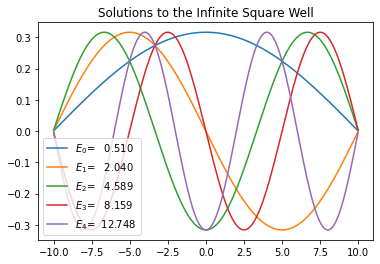

In [75]:
# METHOD 3: Solve the differential equation using the Hamiltonian Matrix but the wavefunctions are normalized

V=np.zeros(N)
h = xs[1]-xs[0]
Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
E,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
psi = np.transpose(psiT) 

for i in range(5):
    plt.plot(xs,-psi[i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))

plt.title("Solutions to the Infinite Square Well")
plt.legend()

# Finite square well potential

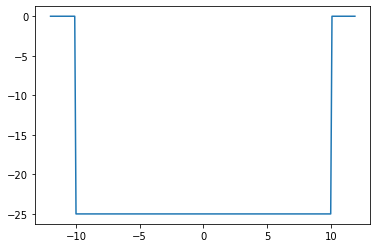

In [76]:
def V(x):
    if (x<-10) or (x>10):
        return 0
    else:
        return -25
x = [x/10 for x in range(-120,120)]
V = [V(x/10) for x in range(-120,120)]
plt.plot(x,V)
plt.show()


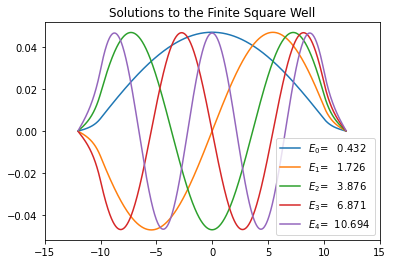

In [77]:
# METHOD 1: Using Method 3 from infinite well for the finite Well

N=1000
a = 24.0
b = 20.
x = np.linspace(-a/2.,a/2.,N)

h = x[1]-x[0] 
V0 = -25
V=np.zeros(N)
for i in range(N):
    if x[i]> -b/2. and x[i]< b/2.:
        V[i]= V0

Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
E,psiT = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
psi = np.transpose(psiT)   # We take the transpose of psiT to the wavefunction vectors can accessed as psi[n]
plt.xlim((-1*a/2-3,1*a/2+3))
for i in range(5):
    if E[i]<0:                 # Only plot the bound states. The scattering states are not reliably computed.
        if psi[i][N-10] < 0:   # Flip the wavefunctions if it is negative at large x, so plots are more consistent.
            plt.plot(x,-psi[i],label="$E_{}$={:>8.3f}".format(i,25+E[i]))
        else:
            plt.plot(x,psi[i],label="$E_{}$={:>8.3f}".format(i,25+E[i]))
plt.title("Solutions to the Finite Square Well")
plt.legend()
plt.show()

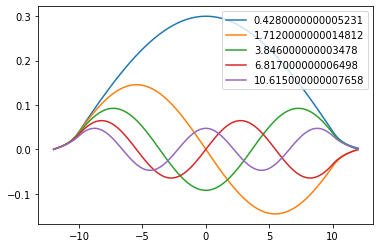

In [78]:
# METHOD 2: Using tolerances for psi to converge to zero at the L=12 endpoint

dE = 0.001
m = 938.272
hc = 197.3269631
L = 24
pi = math.pi
psi0 = 0
dpsi0 = 0.01
Emin = -25
Emax = ((5.5*pi*hc/L)**2)/(2*m)-25

n = 100
h = L/n
x0 = -L/2

def V(x):
    if (x<-10) or (x>10):
        return 0
    else:
        return -25
def f1(x,psi,dpsi):
    return dpsi
def f2(x,psi,dpsi):
    return -2*m*(E-V(x))*psi/(hc**2)
    
tol = [0.3e-2,0.4e-3,0.3e-3,0.5e-3,1e-4]
nos=0
E = Emin
while (E<Emax):
    psi2 = psi0
    dpsi2 = dpsi0
    x2 = x0
    x_list = []
    psi_list = []
    for i in range(n):
        psi1 = psi2
        dpsi1 = dpsi2
        x1 = x2
        x_list.append(x1)
        psi_list.append(psi1)
        psi2, dpsi2 = rk4_simul(f1,f2,x1,psi1,dpsi1,h)
        x2 = x1 + h
    if (abs(psi2)<tol[nos]):
        x_list.append(x2)
        psi_list.append(psi2)
        plt.plot(x_list,psi_list, label = str(25+E))
        E=E+0.5
        nos=nos+1
    E = E + dE
plt.legend()
plt.show()

# Woods saxon potential

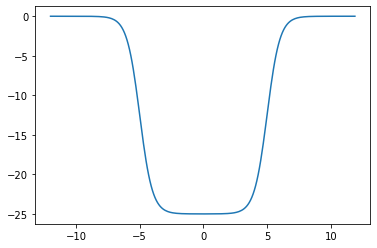

In [79]:
def V(x):
    return -25/(1+math.exp((abs(x)-5)/0.5))
x = [x/10 for x in range(-120,120)]
V = [V(x/10) for x in range(-120,120)]
plt.plot(x,V)
plt.show()

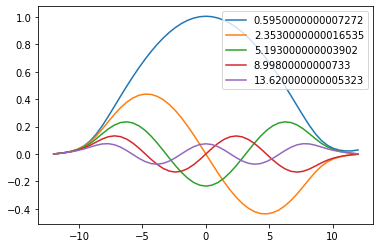

In [80]:
# METHOD 1: Using tolerances for psi to converge to zero at the L=12 endpoint

dE = 0.001
m = 938.272
hc = 197.3269631
L = 24
pi = math.pi
psi0 = 0
dpsi0 = 0.01
Emin = -25
Emax = -11

n = 50
h = L/n
x0 = -L/2

def V(x):
    return -25/(1+np.exp((abs(x)-9)/0.5))
def f1(x,psi,dpsi):
    return dpsi
def f2(x,psi,dpsi):
    return -2*m*(E-V(x))*psi/(hc**2)

E = Emin
tol=[0.05,0.01,0.001,0.001,0.001]
nos=0
sign = 1

while (E<Emax):
    psi2 = psi0
    dpsi2 = dpsi0
    x2 = x0
    x_list = []
    psi_list = []
    for i in range(n):
        psi1 = psi2
        dpsi1 = dpsi2
        x1 = x2
        x_list.append(x1)
        psi_list.append(psi1)
        psi2, dpsi2 = rk4_simul(f1,f2,x1,psi1,dpsi1,h)
        x2 = x1 + h
    if (abs(psi2)<tol[nos]):
        x_list.append(x2)
        psi_list.append(psi2)
        plt.plot(x_list,psi_list, label = str(E+25))
        E=E+1
        nos=nos+1
    E = E + dE
plt.legend()
plt.show()

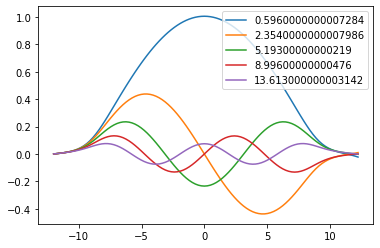

In [81]:
# Woods saxon potential
# METHOD 2: Check when psi changes sign at the L=12 endpoint.
# Also, the output generates faster

dE = 0.001
m = 938.272
hc = 197.3269631
L = 24
pi = math.pi
psi0 = 0
dpsi0 = 0.01
Emin = -25
Emax = -11

n = 100     #Using finer intervals yet faster output
h = L/n
x0 = -L/2

def V(x):
    return -25/(1+math.exp((abs(x)-9)/0.5))
def f1(x,psi,dpsi):
    return dpsi
def f2(x,psi,dpsi):
    return -2*m*(E-V(x))*psi/(hc**2)

E = Emin
sign = 1
n_value = 0
n_max = 5

while (E<Emax):
    psi2 = psi0
    dpsi2 = dpsi0
    x2 = x0
    x_list = []
    psi_list = []
    for i in range(n+1):
        psi1 = psi2
        dpsi1 = dpsi2
        x1 = x2
        x_list.append(x1)
        psi_list.append(psi1)
        psi2, dpsi2 = rk4_simul(f1,f2,x1,psi1,dpsi1,h)
        x2 = x1 + h
    if (abs(math.copysign(1,psi2)-sign)>1):
        sign = -sign
        x_list.append(x2)
        psi_list.append(psi2)
        plt.plot(x_list,psi_list, label = str(E+25))
        E=E+1.7
    E = E + dE
plt.legend()
plt.show()